##Project: Resume Classification

### Dataset description

The data is in CSV format, with two features: Category, and Resume.

**Category** -  Industry sector to which the resume belongs to, and

**Resume** - The complete CV (text) of the candidate.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# read the dataset

df=pd.read_csv("UpdatedResumeDataSet.csv")
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


### Pre-processing and EDA

In [ ]:
# Display the distinct categories of resume

print(df['Category'].unique())



['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


In [ ]:
len(df['Category'].unique())

25

In [ ]:
# Display the distinct categories of resume and the number of records belonging to each category

df.groupby(['Category']).count()

,Resume
Category,
Advocate,20
Arts,36
Automation Testing,26
Blockchain,40
Business Analyst,28
Civil Engineer,24
Data Science,40
Database,33
DevOps Engineer,55


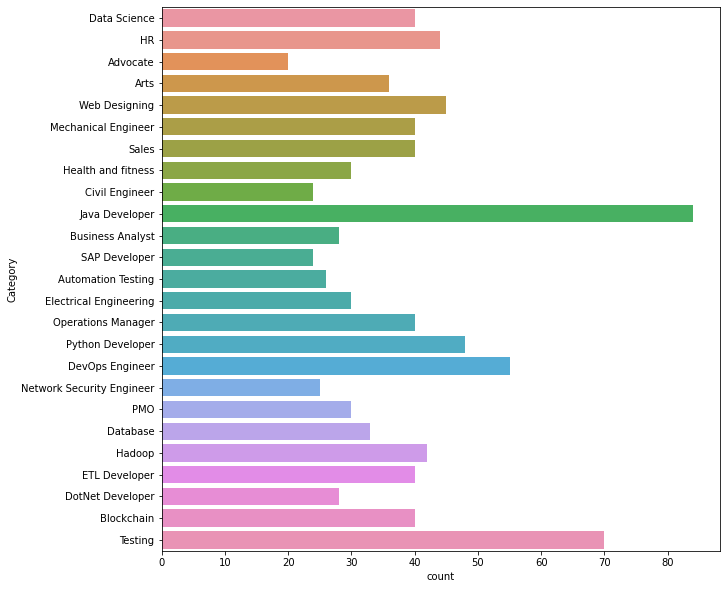

In [ ]:
#Countplot of category
plt.figure(1, figsize=(10,10))
sns.countplot(y=df["Category"]);

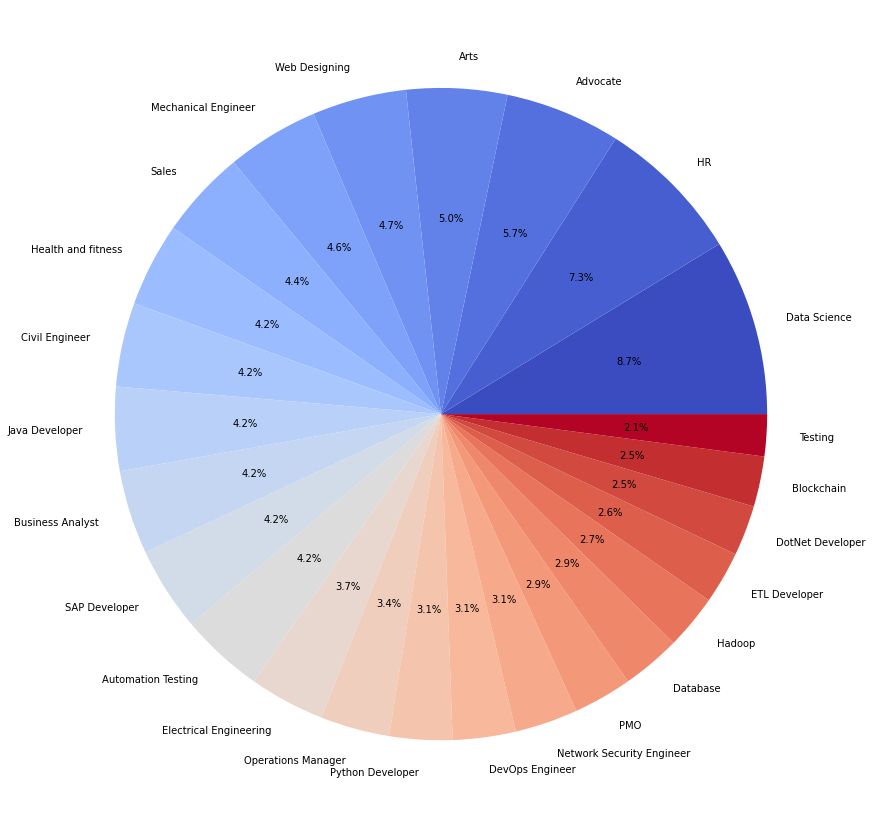

In [ ]:
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(15,15))
the_grid = GridSpec(2, 2)
colormap = plt.get_cmap('coolwarm')
colors = [colormap(i) for i in np.linspace(0, 1, len(targetCounts))]

plt.pie(x=targetCounts, labels=targetLabels, colors=colors, autopct='%1.1f%%');


In [ ]:
# Convert all characters to lowercase

df['Resume']=df['Resume'].str.lower()

In [ ]:
df

,Category,Resume
0,Data Science,skills * programming languages: python (pandas...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...
2,Data Science,"areas of interest deep learning, control syste..."
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...
4,Data Science,"education details \r\n mca ymcaust, faridab..."
...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...
958,Testing,â willingness to accept the challenges. â ...
959,Testing,"personal skills â¢ quick learner, â¢ eagerne..."
960,Testing,computer skills & software knowledge ms-power ...


### Cleaning resumes' text data



In the text there are special characters, urls, hashtags, mentions, etc. Remove the following:  

* URLs
* punctuations
* extra whitespace




In [ ]:
import re
def remove_url(resumeText):
  # YOUR CODE HERE
  resumeText= re.sub(r'http\S+', '', resumeText)
  return resumeText

def remove_special_characters(resumeText):
  pattern=r'[^a-zA-Z0-9\s]'
  resumeText = re.sub(pattern,'', resumeText)
  return resumeText

def extra_space(resumeText):
  resumeText = ' '.join(resumeText.split())
  return resumeText

def cleanResume(resumeText):
  resumeText = remove_url(resumeText)
  resumeText = remove_special_characters(resumeText)
  resumeText = extra_space(resumeText)
  return resumeText

In [ ]:
 # apply the function defined above

df['Cleaned Resume'] = df['Resume'].apply(cleanResume)


In [ ]:
sent_lens = []
for i in df['Cleaned Resume']:
    length = len(i.split())
    sent_lens.append(length)

print('Total Number of Resume = ', len(sent_lens))
print('Maximum length of the resume = ', max(sent_lens))

Total Number of Resume =  962
Maximum length of the resume =  2014


### Stopwords removal

The stopwords, for example, `and, the, was, and so forth` etc. appear very frequently in the text and are not helpful in the predictive process. Therefore these are usually removed for text analytics and text classification purposes.



In [ ]:
# stop words
stopwords_list = nltk.corpus.stopwords.words('english')

print('List of stop words \n', stopwords_list)

List of stop words 
 ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

In [ ]:
def remove_stopwords(text):
  tokens = word_tokenize(text)
  tokens = [token.strip() for token in tokens]
  tokens = [word for word in tokens if word not in stopwords_list]
  token_text = ' '.join(tokens)
  return token_text

In [ ]:
df['Cleaned Resume'] = df['Cleaned Resume'].apply(remove_stopwords)

In [ ]:
df

,Category,Resume,Cleaned Resume
0,Data Science,skills * programming languages: python (pandas...,skills programming languages python pandas num...
1,Data Science,education details \r\nmay 2013 to may 2017 b.e...,education details may 2013 may 2017 uitrgpv da...
2,Data Science,"areas of interest deep learning, control syste...",areas interest deep learning control system de...
3,Data Science,skills â¢ r â¢ python â¢ sap hana â¢ table...,skills r python sap hana tableau sap hana sql ...
4,Data Science,"education details \r\n mca ymcaust, faridab...",education details mca ymcaust faridabad haryan...
...,...,...,...
957,Testing,computer skills: â¢ proficient in ms office (...,computer skills proficient ms office word basi...
958,Testing,â willingness to accept the challenges. â ...,willingness accept challenges positive thinkin...
959,Testing,"personal skills â¢ quick learner, â¢ eagerne...",personal skills quick learner eagerness learn ...
960,Testing,computer skills & software knowledge ms-power ...,computer skills software knowledge mspower poi...


In [ ]:
# most common words

df_cleaned_resume = df['Cleaned Resume']
common_word = ' '.join(word for word in df_cleaned_resume)
token = common_word.split()
fd1 = FreqDist(token)
fd1

FreqDist({'exprience': 3829, 'company': 3526, 'project': 3353, 'months': 3283, 'description': 3122, 'details': 3096, 'data': 2129, 'management': 1969, 'team': 1918, '1': 1875, ...})

In [ ]:
#Most common word in the resume
fd1.most_common(1)

[('exprience', 3829)]

<function matplotlib.pyplot.show(*args, **kw)>

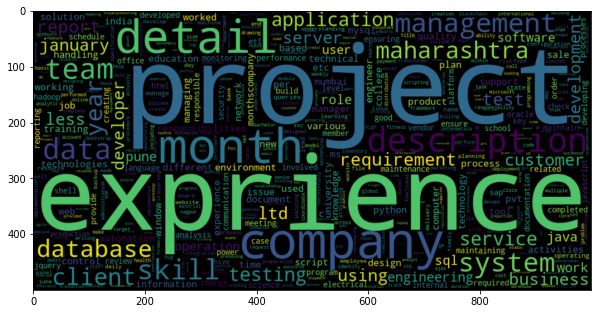

In [ ]:
# To show the most common word using WordCloud
plt.figure(figsize=(10,10))
df_cleaned_resume = df['Cleaned Resume']
common_word = ' '.join(word for word in df_cleaned_resume)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5, collocations=False)
most_common_word=WC.generate(common_word)
plt.imshow(most_common_word, interpolation='bilinear')
plt.show


In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
df['Coded Category']=label_encoder.fit_transform(df['Category'])


In [ ]:
df['Coded Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [ ]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

### Feature Extraction

In [ ]:

tv = TfidfVectorizer(ngram_range=(1,3))
X = df['Cleaned Resume']
tfidf_resume = tv.fit_transform(X)
print('Tfidf Resume vectorised shape :', tfidf_resume.shape)

Tfidf Resume vectorised shape : (962, 84618)


In [ ]:
print(tfidf_resume)

  (0, 50777)	0.02554281945080991
  (0, 9815)	0.02554281945080991
  (0, 18266)	0.02554281945080991
  (0, 40234)	0.02554281945080991
  (0, 71208)	0.02554281945080991
  (0, 39798)	0.02554281945080991
  (0, 35480)	0.02554281945080991
  (0, 75401)	0.02554281945080991
  (0, 77492)	0.02554281945080991
  (0, 5254)	0.02554281945080991
  (0, 4056)	0.02554281945080991
  (0, 65226)	0.02554281945080991
  (0, 31775)	0.02554281945080991
  (0, 36898)	0.02554281945080991
  (0, 5528)	0.02554281945080991
  (0, 35793)	0.02554281945080991
  (0, 73891)	0.02554281945080991
  (0, 3046)	0.02554281945080991
  (0, 38444)	0.02554281945080991
  (0, 13064)	0.02554281945080991
  (0, 79986)	0.02554281945080991
  (0, 73953)	0.02554281945080991
  (0, 28033)	0.02554281945080991
  (0, 81059)	0.021060567611714986
  (0, 5258)	0.02554281945080991
  :	:
  (961, 58743)	0.014830105601528656
  (961, 62422)	0.03748559640024693
  (961, 52314)	0.02075432117328807
  (961, 5324)	0.01912623827998204
  (961, 26603)	0.01912623827998204

## Naive Bayes Classifier

In [ ]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(tfidf_resume, df['Category'], test_size=0.2, random_state=0, shuffle=True)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(769, 84618)
(193, 84618)
(769,)
(193,)


In [ ]:
mnb = MultinomialNB()
mnb_tfidf = mnb.fit(X_train, y_train)
print("Multinomial NB for TF-IDF:", mnb_tfidf)

Multinomial NB for TF-IDF: MultinomialNB()


In [ ]:
mnb_tfidf_predict=mnb.predict(X_test)
print('Prediction for tfidf:', mnb_tfidf_predict)

Prediction for tfidf: ['Python Developer' 'Health and fitness' 'Data Science'
 'Network Security Engineer' 'Java Developer' 'Health and fitness'
 'ETL Developer' 'Health and fitness' 'Java Developer' 'Testing'
 'Data Science' 'Testing' 'Business Analyst' 'Electrical Engineering'
 'Hadoop' 'Business Analyst' 'PMO' 'DevOps Engineer' 'DevOps Engineer'
 'DotNet Developer' 'HR' 'Electrical Engineering'
 'Network Security Engineer' 'Sales' 'PMO' 'Mechanical Engineer'
 'Civil Engineer' 'DevOps Engineer' 'Blockchain' 'Java Developer'
 'Python Developer' 'Operations Manager' 'Sales' 'Database' 'Testing'
 'Testing' 'Sales' 'Operations Manager' 'Database' 'Python Developer'
 'ETL Developer' 'Python Developer' 'Health and fitness' 'DevOps Engineer'
 'Java Developer' 'Java Developer' 'DevOps Engineer'
 'Electrical Engineering' 'Business Analyst' 'Sales' 'Arts'
 'Web Designing' 'Health and fitness' 'Java Developer' 'Sales' 'Testing'
 'DevOps Engineer' 'Java Developer' 'Blockchain'
 'Network Security

In [ ]:
mnb_tfidf_score=accuracy_score(y_test, mnb_tfidf_predict)
print('Accuracy score for the model is ', round(mnb_tfidf_score*100, 4), '%')

Accuracy score for the model is  97.4093 %


## To create a Gradio based web interface to test and display the model predictions

In [ ]:
!pip -qq install gradio

     |████████████████████████████████| 11.6 MB 23.4 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 106 kB 55.6 MB/s 
     |████████████████████████████████| 84 kB 2.2 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 278 kB 49.2 MB/s 
     |████████████████████████████████| 2.3 MB 65.5 MB/s 
     |████████████████████████████████| 213 kB 30.8 MB/s 
     |████████████████████████████████| 56 kB 3.2 MB/s 
     |████████████████████████████████| 55 kB 2.3 MB/s 
     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 68 kB 4.5 MB/s 
     |████████████████████████████████| 68 kB 5.4 MB/s 
     |████████████████████████████████| 68 kB 7.5 MB/s 
     |████████████████████████████████| 68 kB 3.1 MB/s 
     |████████████████████████████████| 46 kB 4.6 MB/s 
     |███████████████████████████████

In [ ]:
import gradio
def cleanResume(resumeText):
  resumeText = remove_url(resumeText)
  resumeText = remove_special_characters(resumeText)
  resumeText = extra_space(resumeText)
  resumeText = remove_stopwords(resumeText)
  resumeText = resumeText.lower()
  return resumeText

In [ ]:
def predict_resume_label(text):
    processed_text = cleanResume(text)
    resume = tv.transform([processed_text])
    pred = mnb_tfidf.predict(resume)
    return pred[0]

In [ ]:
# Input from user
in_resume = gradio.inputs.Textbox(lines=2, placeholder=None, label='Enter Resume Text')

In [ ]:
# Output prediction
out_label = gradio.outputs.Textbox(type="text", label='Predicted Resume Label')

In [ ]:
# Gradio interface to generate UI link

iface = gradio.Interface(
  fn = predict_resume_label,
  inputs = [in_resume],
  outputs = [out_label])
iface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://a5075cb53ad153a1.gradio.app

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


**Report Analysis**
- Which method(s), other than TF-IDF could be used for text to vector conversion?
- Discuss about the `alpha`, `class_prior` and `fit_prior` parameters in sklearn `MultinomialNB`


Dataset Source Reference: [Resume dataset](https://www.kaggle.com/gauravduttakiit/resume-dataset/download)